Minería de datos grupo 001 Lunes 

Equipo 3:

- González Berumen Ricardo        1941497
- Gaytán Gutiérrez José Claudio   1855455
- López Verduzco Ruy Aramis       1863861
- Rodríguez Pacheco Nancy Janeth  1845816
- Ruiz Espitia Thalía             1941494

1. Título de la base de datos

a) Nombre: Bread Basket

b) URL: https://www.kaggle.com/mittalvasu95/the-bread-basket 

2. Introducción general

En la operación general de un negocio tal como una panadería es de
vital importancia tener un conocimiento amplio del mercado, esto con
la razón de abastecer la demanda de los productos que forman parte
del menú, tomando decisiones estrategicas en cuanto al invenariado de acuerdo al comportamiento de los clientes.

3. Descripción de los datos

a) ¿Qué tipo de datos son?

Es la base de datos "The bread basket" en formato csv, la cual
contiene los registros de las transacciones realizadas en un negocio de pan 
entre las fechas del 30 de octubre 2016 a las 09:58
horas 15 de abril 2017 a las 15:04 horas. Se cuenta con 9684
registros en total. 

b) Descripción de las columnas.

La tabla está compuesta de las siguientes columnas:
- Transaction :     Número de transacción que ocupa en la lista.
- Item :            El tipo de producto que tuvo la interacción.
- date_time :       Fecha y hora en que se realizó la venta.
- period_day :      Tiempo del día en que se ubica (mañana o tarde).
- weekday_weekend : Ubicación en la semana laboral (entre semana o en fin de semana).

4. Justificación del uso de datos

A) Características destacables
Se puede ver la manera en que la hora del día o el día de la
semana influyen en la popularidad de algún producto en especial,
por lo que para el desarrollo de un negocio es muy importante
conocer las tendencias a diferentes tiempos. Así como la
popularidad de ciertos conjuntos de productos que se compran en conjunto.

B) Beneficios del uso
Haciendo uso de los datos podemos notar que algunos productos
son comprados en conjunto, por lo que se puede dar un área de
oportunidad para capitalizar en dicha tendencia; empleando
recursos tales como promociones, descuentos, etc.
Debido a la naturaleza de los datos podemos identificar qué objetos
del menú son altamente populares en ciertas horas del dia y asi producir estrategicamente para atender la demanda.

5. Objetivos

- Objetivo principal
Identificar la popularidad de los productos que se compran en conjunto en general y de acuerdo a la hora
del día; haciendo uso de reglas de asociación para este fin.

- Objetivo secundario
Analizar las tendencias en las transacciones de los productos haciendo
uso de series de tiempo.

6. Preguntas de interés

- ¿Qué productos son comprados en conjuntos con mayor
prevalencia?
- ¿La hora del día influye en las decisiones de los clientes?
- ¿Existe alguna relación entre los productos que son
normalmente comprados en conjunto?
- ¿A qué hora del día las ventas son más prevalentes?
- ¿La popularidad del establecimiento es constante, creciente
o decreciente?


# Limpieza de datos

In [2]:
import numpy as np
import pandas as pd

## Dimension de la base de datos

In [3]:
data = pd.read_csv("breadBasket.csv")
print("Numero de Filas y columnas: ", data.shape)
print("Nombre de las columnas: ", data.columns)
columnas = data.columns

Numero de Filas y columnas:  (20507, 5)
Nombre de las columnas:  Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')


Los nombres de las columnas nos parecieron bien porque no conllevan espacios, por tanto no se modificaron.

## Acercamiento a la base de datos
Se ve los primeros 5 datos de la base, para saber el tipo de dato que lleva cada columna a trabajar.

In [ ]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


## Descripcion de las columnas


In [ ]:
data.dtypes

Transaction         int64
Item               object
date_time          object
period_day         object
weekday_weekend    object
dtype: object

La columna Transaction es una columna indice, las demas son categoricas.

## Objetos nulos

In [ ]:
data.isnull().any()

Transaction        False
Item               False
date_time          False
period_day         False
weekday_weekend    False
dtype: bool

No hay valores nulos en toda la base de datos.

## Valores unicos 
Como se haran clasificaciones por producto en cada transaccion, nos interesa ver los productos unicos en las transacciones y la cantidad de cada uno. 

In [4]:
conteoProductos = data.groupby(by= "Item").size().reset_index(name='counts').sort_values(by = "counts", ascending=False)
print(conteoProductos)

              Item  counts
23          Coffee    5471
11           Bread    3325
83             Tea    1435
15            Cake    1025
65          Pastry     856
..             ...     ...
19    Chicken sand       1
41    Gift voucher       1
63  Olum & polenta       1
71        Raw bars       1
0       Adjustment       1

[94 rows x 2 columns]


Tambien los valores unicos en cada columna:

In [ ]:
for columna in columnas:
    print(str(columna))
    print(np.unique(data[str(columna)]))

Transaction
[   1    2    3 ... 9682 9683 9684]
Item
['Adjustment' 'Afternoon with the baker' 'Alfajores' 'Argentina Night'
 'Art Tray' 'Bacon' 'Baguette' 'Bakewell' 'Bare Popcorn' 'Basket'
 'Bowl Nic Pitt' 'Bread' 'Bread Pudding' 'Brioche and salami' 'Brownie'
 'Cake' 'Caramel bites' 'Cherry me Dried fruit' 'Chicken Stew'
 'Chicken sand' 'Chimichurri Oil' 'Chocolates' 'Christmas common' 'Coffee'
 'Coffee granules ' 'Coke' 'Cookies' 'Crepes' 'Crisps'
 'Drinking chocolate spoons ' 'Duck egg' 'Dulce de Leche' 'Eggs'
 "Ella's Kitchen Pouches" 'Empanadas' 'Extra Salami or Feta' 'Fairy Doors'
 'Farm House' 'Focaccia' 'Frittata' 'Fudge' 'Gift voucher'
 'Gingerbread syrup' 'Granola' 'Hack the stack' 'Half slice Monster '
 'Hearty & Seasonal' 'Honey' 'Hot chocolate' 'Jam' 'Jammie Dodgers'
 'Juice' 'Keeping It Local' 'Kids biscuit' 'Lemon and coconut' 'Medialuna'
 'Mighty Protein' 'Mineral water' 'Mortimer' 'Muesli' 'Muffin'
 'My-5 Fruit Shoot' 'Nomad bag' 'Olum & polenta' 'Panatone' 'Pastry'
 

## Modificacion en el formato de la fecha
Como la base de datos venia en formato de day/month/year y este formato no permite ordenar por fecha o agrupar ya sea por año o mes, por lo que se modifico y se agrego en columnas distintas:

In [20]:
#Rutina para cambiar formato de la fecha
year = []
month = []
day = []
cleanDate = []
for fecha in data["date_time"]:
    #print(fecha)
    #Para separar año
    for fechaseparada in fecha.split("-"):
        if len(fechaseparada)>2:
            yearTEMP = fechaseparada.split(" ")[0]
            year.append(yearTEMP)
    #Para separar dia
    dayTEMP = fecha.split("-")[0]
    day.append(dayTEMP)
    #Para separar mes
    monthTEMP = fecha.split("-")[1]
    month.append(monthTEMP)
    clean = yearTEMP + "-" + monthTEMP + "-" + dayTEMP
    cleanDate.append(clean)

#print(cleanDate)
#Agregamos las columnas a la base de datos
data_cleandate = data.assign(clean_date = cleanDate,year = year, month = month, day = day)
data_cleandate

,Transaction,Item,date_time,period_day,weekday_weekend,clean_date,year,month,day
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,2016,10,30
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09


En la siguiente tabla, se agrupo para realizar un conteo de ventas por dia y de ahi crear una serie de tiempo denominada "serieVentas"

In [60]:
serieVentas = data_cleandate.groupby(by = "clean_date").size().reset_index(name='counts').sort_values(by = "clean_date", ascending=True)
print(serieVentas)

     clean_date  counts
0    2016-10-30     170
1    2016-10-31     199
2    2016-11-01     150
3    2016-11-02     164
4    2016-11-03     189
..          ...     ...
154  2017-04-05     143
155  2017-04-06     118
156  2017-04-07      99
157  2017-04-08     205
158  2017-04-09      69

[159 rows x 2 columns]


# Descripcion estadistica basica
Se usara la base de datos con la serie de tiempo de ventas diarias:

In [81]:
print("\t\tESTADISTICA BASICA DE LA SERIE DE VENTAS DIARIAS: \nSuma: ",serieVentas["counts"].sum(),
"\nPromedio: ",serieVentas["counts"].mean(),
"\nConteo: ",serieVentas["counts"].count(), 
"\nMinimo: ",serieVentas["counts"].min(),
"\nMaximo: ",serieVentas["counts"].max(),
"\nMedia: ",serieVentas["counts"].median(),
"\nVarianza: ",serieVentas["counts"].var(),
"\nDesviacion estandar: ",serieVentas["counts"].std(),
"\nSkewness: ",serieVentas["counts"].skew(),
"\nKurtosis: ",serieVentas["counts"].kurt())





		ESTADISTICA BASICA DE LA SERIE DE VENTAS DIARIAS: 
Suma:  20507 
Promedio:  128.9748427672956 
Conteo:  159 
Minimo:  1 
Maximo:  292 
Media:  118.0 
Varianza:  2028.2778441206908 
Desviacion estandar:  45.03640576378949 
Skewness:  0.8689889126550832 
Kurtosis:  1.3249945707062833


# Graficas

Para visualizar la informacion anterior, se graficara:

In [7]:
import pandas as pd
import matplotlib as plt

## Grafica de barras

Con el siguiente grafico se puede ver cuales son los 15 productos mas vendidos y al mas vendido que es el cafe:

<AxesSubplot:>

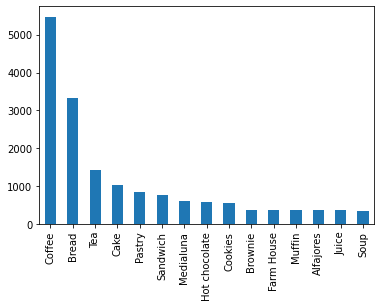

In [ ]:
data_cleandate["Item"].value_counts().head(15).plot.bar()

Al agruparlos por el periodo del dia, se ve que por la tarde es cuando hay mas venta: 

<AxesSubplot:>

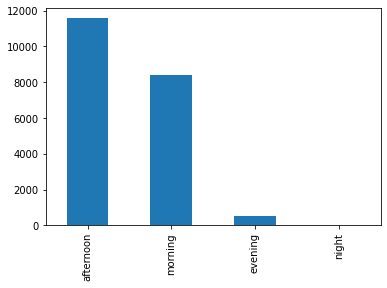

In [8]:
data_cleandate["period_day"].value_counts().plot.bar()

## Grafica de lineas 
En este caso podemos usar la base de datos con las ventas diarias para poder visualizar la serie de tiempo de mejor manera:

<AxesSubplot:>

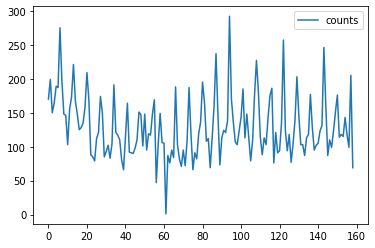

In [9]:
serieVentas.plot.line()

## Scatterplot
Se separo la hora de la fecha para tener cierta visualizacion en la concentracion de compras por hora:

In [21]:
hour = []
for fecha in data["date_time"]:
    #print(fecha)
    #Para separar hora
    for fechaseparada in fecha.split("-"):
        if len(fechaseparada)>2:
            hourTEMP = fechaseparada.split(" ")[1]
            hour.append(int(hourTEMP.split(":")[0]))

data_cleandate = data_cleandate.assign(hour = hour)
data_cleandate

,Transaction,Item,date_time,period_day,weekday_weekend,clean_date,year,month,day,hour
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,2016,10,30,9
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30,10
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30,10
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30,10
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30,10
...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09,14
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09,14
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09,14
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09,14


Se prefiere la siguiente porque asi se puede apreciar mejor la concentracion:

<AxesSubplot:xlabel='hour', ylabel='Transaction'>

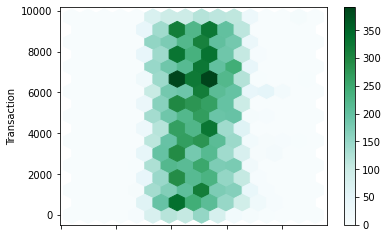

In [25]:
data_cleandate.plot.hexbin(x="hour",y="Transaction", gridsize=15)

## Stacked plots
Este nos ayuda a comparar no solo la diferencia de ventas en los tiempos en el dia, si no a comparar tambien el total de ventas separados por entre semana y fin de semana:

<AxesSubplot:xlabel='weekday_weekend'>

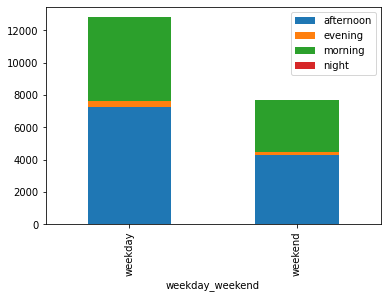

In [ ]:
pd.DataFrame(data_cleandate.pivot_table(index="weekday_weekend", columns="period_day", aggfunc="size", fill_value=0), columns = ["weekday_weekend","afternoon","evening","morning","night"])[["afternoon","evening","morning","night"]].plot.bar(stacked = True)
#replace(['afternoon','evening','morning','night','weekday','weekend'],[1,2,0,3,1,2])

Con este es evidente las ventas totales entre semana superan al fin pero son parecidas:

<AxesSubplot:xlabel='weekday_weekend'>

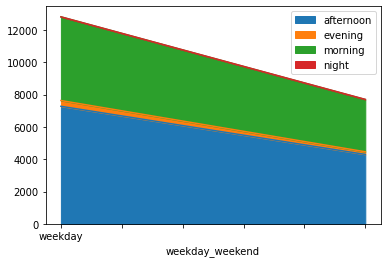

In [ ]:
pd.DataFrame(data_cleandate.pivot_table(index="weekday_weekend", columns="period_day", aggfunc="size", fill_value=0), columns = ["weekday_weekend","afternoon","evening","morning","night"])[["afternoon","evening","morning","night"]].plot.area()

Aqui se hace el comparativo pero separados por periodo del dia:
(Las separaciones son mañana, tarde, atardecer y noche pero fueron cambiados a numeros para poder ordenarlos)

<AxesSubplot:xlabel='period_day'>

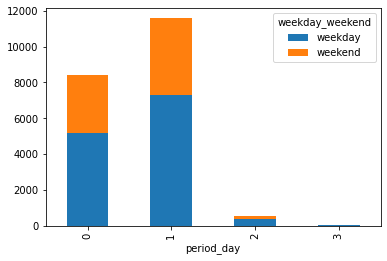

In [ ]:
pd.DataFrame(data_cleandate.replace(['afternoon','evening','morning','night'],[1,2,0,3]).pivot_table(index="period_day", columns="weekday_weekend", aggfunc="size", fill_value=0))[ ["weekday","weekend"]].plot.bar(stacked = True)
#data_cleandate.replace(['afternoon','evening','morning','night'],[1,2,0,3]).pivot_table(index="period_day", columns="weekday_weekend", aggfunc="size", fill_value=0)
#replace(['afternoon','evening','morning','night','weekday','weekend'],[1,2,0,3,1,2])
#data_cleandate.pivot_table(index="period_day", columns="weekday_weekend", aggfunc="size", fill_value=0)

Con este es mas evidente las horas en las que las ventas son mayores:

<AxesSubplot:xlabel='period_day'>

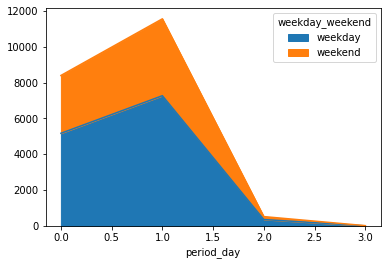

In [ ]:
pd.DataFrame(data_cleandate.replace(['afternoon','evening','morning','night'],[1,2,0,3]).pivot_table(index="period_day", columns="weekday_weekend", aggfunc="size", fill_value=0))[ ["weekday","weekend"]].plot.area()


## Boxplot

In [26]:
import seaborn as sns

Se puede visualizar la concentracion de los datos entre semana y fin de semana de acuerdo a su hora. En la cual podemos ver que la concentracion de ventas es entre las 9 y 15 horas:

<AxesSubplot:xlabel='weekday_weekend', ylabel='hour'>

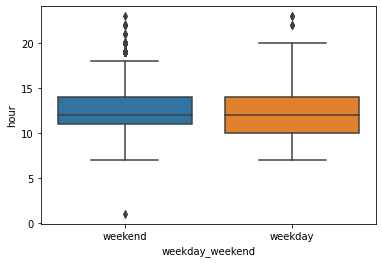

In [27]:
sns.boxplot(x="weekday_weekend", y= "hour", data = data_cleandate)

<AxesSubplot:xlabel='weekday_weekend', ylabel='hour'>

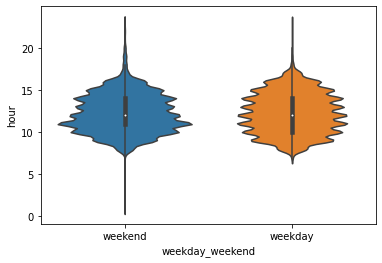

In [28]:
sns.violinplot(x="weekday_weekend", y= "hour", data = data_cleandate)

## Pie chart COMPARACION

En la siguiente podemos comparar los mismos datos, solo que de forma distinta. En las barras podemos distinguir el periodo de dia donde mas se vende junto con su frecuencia pero en la grafica de pastel, solo de puede observar la proporcion total:

In [29]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

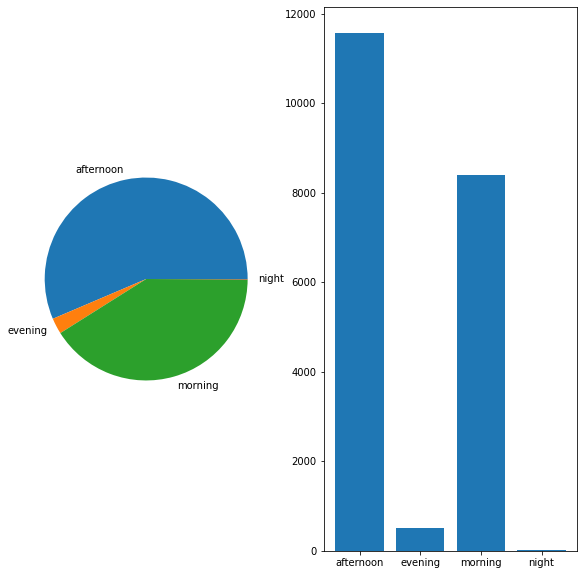

In [59]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
piedata = data_cleandate.groupby(by = "period_day").size().reset_index(name='counts')
ax1.pie(piedata["counts"],labels = piedata["period_day"])

bardata= data_cleandate.groupby(by ="period_day").size().reset_index(name='counts')
ax2.bar(bardata["period_day"],bardata["counts"])


# Conclusion 
Con las visualizaciones ahora es mas claro tomar decisiones en cuanto cuales productos son mas vendidos y a que hora del dia es en donde se presentan mas compras.
Toda esta informacion, en caso de que seamos los dueños del negocio, nos es de gran ayuda para tomar decisiones en los suministros de cada producto. 
Lo que nos hace falta es saber cuales son los conjuntos de datos que mas se venden, el cual se estara utilizando las reglas de decision y en cuanto a la tendencia en ventas (popularidad) tambien se estara empleando un analisis de serie de tiempo.